# Documentation


*   Stopwords for the column *industry_groups*
*   Stopwords for the column *headquarters*
*   A bar chart representing the year in which the company has been founded
*   A heatmap representing null values in a dataset
*   A bar chart for Total number of funding amount for a company
*   A pie chart representing startup count based on industry category
*   A bar chart representing startup count based on industry category
*   A bar plot for top 10 company categories







In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt  #for data visualization
import seaborn as sns #for data visualization
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd

In [42]:
path = "/content/drive/MyDrive/Omdena/filtered_crunchbase_with_funding.csv"
df = pd.read_csv(path)

In [43]:
df.head(10)

,Unnamed: 0,company_name,description,website,funding,industries,num_employees,headquarters,founded_date,industry_groups,full_description,filter
0,0,ABYA,ABYA is a developer and provider technological...,https://www.abya.tech/,750000.0,"Media and Entertainment, Software",01 to 10,"East Setauket, New York, United States",2018,"Media and Entertainment, Software",ABYA is a developer and provider of technologi...,Software-2018
1,1,Agamon,Agamon is an AI-powered healthcare platform th...,https://www.agamonhealth.com,3000000.0,"Artificial Intelligence, Big Data, Health Car...",01 to 10,"New York, New York, United States",2018,"Artificial Intelligence, Data and Analytics, ...",Agamon is a healthcare AI platform uses advanc...,Software-2018
2,2,Agape,Agape is a platform scientifically designed to...,https://www.theagapeapp.com/,75000.0,"Developer Platform, Information Services, Inf...",01 to 10,"Rochester, New York, United States",2018,"Health Care, Information Technology, Software",Agapé is a platform scientifically designed to...,Software-2018
3,3,Agave,Agave is a free hiring platform that offers jo...,https://www.agave.com/,1000000.0,"Recruiting, SaaS, Software, Staffing Agency",01 to 10,"Palo Alto, California, United States",01-01-18 0:00,"Administrative Services, Professional Service...",Agave is a free hiring platform that offers jo...,Software-2018
4,4,Agita Labs,Agita Labs develops privacy-enhanced computing...,http://www.agitalabs.com/,3149992.0,"Cloud Computing, Cyber Security, Privacy",01 to 10,"Ann Arbor, Michigan, United States",2018,"Information Technology, Internet Services, Pr...","Agita Labs is a new startup in Ann Arbor, Mich...",Software-2018
5,5,Agoric,Agoric provides a framework for programming sm...,https://agoric.com/,4000000.0,"Blockchain, Cryptocurrency, Developer Platfor...",01 to 10,"San Francisco, California, United States",2018,"Commerce and Shopping, Financial Services, In...",Agoric is a framework that provides security a...,Software-2018
6,6,Agreemint,The Search for Faster Closes Ends Here.,https://www.agreemint.com/,70000.0,"Artificial Intelligence, Information Technolo...",01 to 10,"San Francisco, California, United States",2018,"Artificial Intelligence, Data and Analytics, ...","Through the Agreemint Contract Platform AI, us...",Software-2018
7,7,Aligned Carbon,Aligned Carbon is a supplier of aligned carbon...,https://www.alignedcarbon.com/,1047000.0,"Computer, Information Technology, Nanotechnology",01 to 10,"Santa Clara, California, United States",2018,"Consumer Electronics, Hardware, Information T...",Aligned Carbon is a supplier of aligned carbon...,Software-2018
8,8,Allelica,Allelica is a genomics software company drivin...,https://www.allelica.com/,1750000.0,"Biotechnology, Genetics, Health Care, Life Sc...",01 to 10,"New York, New York, United States",01-01-18 0:00,"Artificial Intelligence, Biotechnology, Data ...",Allelica is a genomics software company drivin...,Software-2018
9,9,ampcontrol.io,ampcontrol.io is an AI-based optimization soft...,https://www.ampcontrol.io/,1100000.0,"Artificial Intelligence, Electric Vehicle, En...",01 to 10,"New York, New York, United States",2018,"Artificial Intelligence, Consumer Electronics...",ampcontrol.io is an AI-based optimization soft...,Software-2018


In [44]:
df.tail(5)

,Unnamed: 0,company_name,description,website,funding,industries,num_employees,headquarters,founded_date,industry_groups,full_description,filter
898,898,DexCare,DexCare provides a Platform-as-a-Service offer...,https://www.dexcarehealth.com/,20000000.0,"Health Care, Hospital, Software",11 to 50,"Seattle, Washington, United States",2021,"Health Care, Software",DexCare is a provider of Platform-as-a-Service...,software_2021
899,899,Curio Digital,Curio Digital is a marketplace for tokenized d...,https://oncurio.com/,8220000.0,Marketplace,01 to 10,"Los Angeles, California, United States",2021,Commerce and Shopping,Curio Digital is a marketplace for tokenized d...,software_2021
900,900,Burnt Finance,Burnt Finance is a decentralized auction proto...,https://burnt.com,3000000.0,"Auctions, Finance, FinTech",11 to 50,"Solana Beach, California, United States",2021,"Commerce and Shopping, Financial Services",Burnt Finance is a decentralized auction proto...,software_2021
901,901,Arrive,Arrive makes investing in vacation rentals as ...,https://arrive.io,250000.0,"FinTech, Hospitality, Marketplace, Mobile App...",01 to 10,"Miami, Florida, United States",2021,"Apps, Commerce and Shopping, Financial Servic...",Arrive enables anyone anywhere to invest in va...,software_2021
902,902,Abbyya,Retail and Gaming,https://www.abbyya.com,10000.0,"E-Commerce, Retail, Software",11 to 50,"Milpitas, California, United States",01-01-21 0:00,"Commerce and Shopping, Software",NaN,software_2021


In [45]:
del df['Unnamed: 0']

In [46]:
df.columns

Index(['company_name', 'description', 'website', 'funding', 'industries',
       'num_employees', 'headquarters', 'founded_date', 'industry_groups',
       'full_description', 'filter'],
      dtype='object')

In [47]:
df.shape

(903, 11)

In [48]:
df.dtypes

company_name         object
description          object
website              object
funding             float64
industries           object
num_employees        object
headquarters         object
founded_date         object
industry_groups      object
full_description     object
filter               object
dtype: object

In [49]:
df.describe()

,funding
count,9.030000e+02
mean,2.912881e+06
std,7.398572e+06
min,1.000000e+03
25%,1.500000e+05
50%,8.733980e+05
75%,2.650000e+06
max,1.050000e+08


In [50]:
df.info

<bound method DataFrame.info of       company_name  ...         filter
0             ABYA  ...  Software-2018
1           Agamon  ...  Software-2018
2            Agape  ...  Software-2018
3            Agave  ...  Software-2018
4       Agita Labs  ...  Software-2018
..             ...  ...            ...
898        DexCare  ...  software_2021
899  Curio Digital  ...  software_2021
900  Burnt Finance  ...  software_2021
901         Arrive  ...  software_2021
902         Abbyya  ...  software_2021

[903 rows x 11 columns]>

In [51]:
import numpy as np
#percentage of null values in each column
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

company_name - 0%
description - 0%
website - 2%
funding - 0%
industries - 0%
num_employees - 0%
headquarters - 0%
founded_date - 0%
industry_groups - 0%
full_description - 11%
filter - 0%


In [52]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("Numeric Columns:")
print(numeric_cols)

print("\n")
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("Non-Numeric Columns:")
print(non_numeric_cols)

Numeric Columns:
['funding']


Non-Numeric Columns:
['company_name' 'description' 'website' 'industries' 'num_employees'
 'headquarters' 'founded_date' 'industry_groups' 'full_description'
 'filter']


In [53]:
# A bar chart presenting the year in which the company has been founded
import plotly.express as px
fig = px.bar(df,y='founded_date',x='company_name',orientation='h',title='Year in which company has been founded')
fig.show()

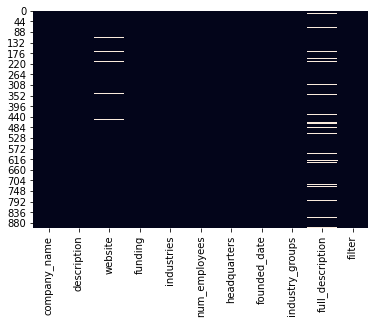

In [54]:
# A heatmap representing null values in a dataset
sns.heatmap(df.isnull(), cbar=False)

In [56]:
df['num_employees'].unique()

array(['01 to 10 ', '11 to 50', '101 to 250'], dtype=object)

In [57]:
df['num_employees'].replace({"01 to 10 ": "1", "11 to 50": "2", "101 to 250": "3"}, inplace=True)

In [58]:
df

,company_name,description,website,funding,industries,num_employees,headquarters,founded_date,industry_groups,full_description,filter
0,ABYA,ABYA is a developer and provider technological...,https://www.abya.tech/,750000.0,"Media and Entertainment, Software",1,"East Setauket, New York, United States",2018,"Media and Entertainment, Software",ABYA is a developer and provider of technologi...,Software-2018
1,Agamon,Agamon is an AI-powered healthcare platform th...,https://www.agamonhealth.com,3000000.0,"Artificial Intelligence, Big Data, Health Car...",1,"New York, New York, United States",2018,"Artificial Intelligence, Data and Analytics, ...",Agamon is a healthcare AI platform uses advanc...,Software-2018
2,Agape,Agape is a platform scientifically designed to...,https://www.theagapeapp.com/,75000.0,"Developer Platform, Information Services, Inf...",1,"Rochester, New York, United States",2018,"Health Care, Information Technology, Software",Agapé is a platform scientifically designed to...,Software-2018
3,Agave,Agave is a free hiring platform that offers jo...,https://www.agave.com/,1000000.0,"Recruiting, SaaS, Software, Staffing Agency",1,"Palo Alto, California, United States",01-01-18 0:00,"Administrative Services, Professional Service...",Agave is a free hiring platform that offers jo...,Software-2018
4,Agita Labs,Agita Labs develops privacy-enhanced computing...,http://www.agitalabs.com/,3149992.0,"Cloud Computing, Cyber Security, Privacy",1,"Ann Arbor, Michigan, United States",2018,"Information Technology, Internet Services, Pr...","Agita Labs is a new startup in Ann Arbor, Mich...",Software-2018
...,...,...,...,...,...,...,...,...,...,...,...
898,DexCare,DexCare provides a Platform-as-a-Service offer...,https://www.dexcarehealth.com/,20000000.0,"Health Care, Hospital, Software",2,"Seattle, Washington, United States",2021,"Health Care, Software",DexCare is a provider of Platform-as-a-Service...,software_2021
899,Curio Digital,Curio Digital is a marketplace for tokenized d...,https://oncurio.com/,8220000.0,Marketplace,1,"Los Angeles, California, United States",2021,Commerce and Shopping,Curio Digital is a marketplace for tokenized d...,software_2021
900,Burnt Finance,Burnt Finance is a decentralized auction proto...,https://burnt.com,3000000.0,"Auctions, Finance, FinTech",2,"Solana Beach, California, United States",2021,"Commerce and Shopping, Financial Services",Burnt Finance is a decentralized auction proto...,software_2021
901,Arrive,Arrive makes investing in vacation rentals as ...,https://arrive.io,250000.0,"FinTech, Hospitality, Marketplace, Mobile App...",1,"Miami, Florida, United States",2021,"Apps, Commerce and Shopping, Financial Servic...",Arrive enables anyone anywhere to invest in va...,software_2021


In [59]:
# Total number of funding amount for a company
import plotly.express as px

fig = px.bar(df,y='funding',x='company_name',orientation='v',title = "Total Funding Amount in a Company")
fig.show()

In [25]:
import re
import string

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [26]:
def clean_text(text):

  text = str(text).lower()

  text = re.sub('https?://\S+|www\.\S+','',text)
  text = re.sub('<.,*?>+','',text)
  text = re.sub('[%s]' % re.escape(string.punctuation),'',text)

  return text

In [27]:
stop_words = stopwords.words('english')

In [28]:
lemmatizer = WordNetLemmatizer()

In [29]:
def preprocess_textdata(text):

  """util function to preprocess text data"""

  text = clean_text(text)
  text = ' '.join(w for w in text.split(' ') if w not in stop_words)
  text = ' '.join(lemmatizer.lemmatize(w) for w in text.split(' '))

  return text

In [30]:
df['industry_groups_clean'] = df['industry_groups'].apply(preprocess_textdata)

In [31]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [32]:
count_vec = CountVectorizer()

count_dtm = count_vec.fit_transform(df['industry_groups_clean'])

words = count_vec.get_feature_names()
words_count = count_dtm.sum(axis=0).A1

words_dict = dict(zip(words,words_count))

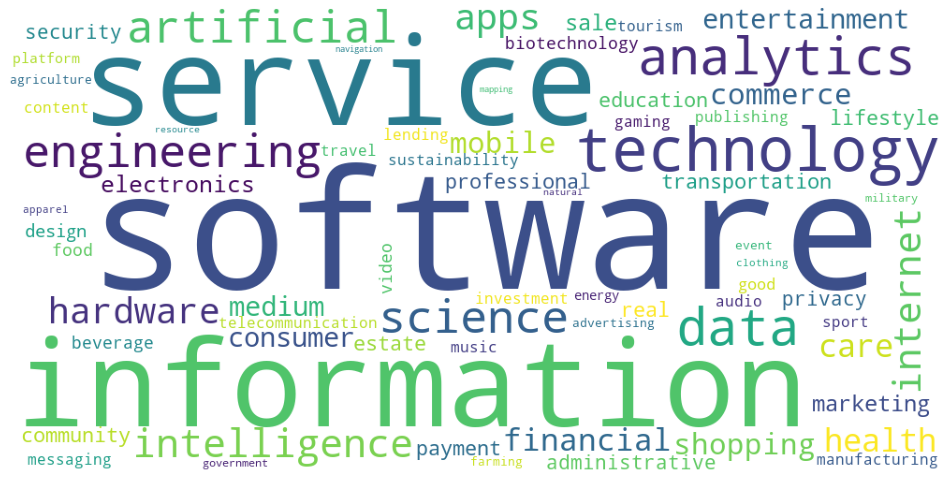

In [33]:
# A word cloud representing the most category of industries
wc = WordCloud(
    background_color = 'white',
    width = 1000,
    height= 500
).generate_from_frequencies(words_dict)

plt.figure(figsize = (13,8))
plt.axis("off")
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.show()

In [34]:
df['industry_groups_clean'].value_counts()

software                                                                                                    25
information technology                                                                                      23
information technology software                                                                             21
artificial intelligence data analytics information technology science engineering software                  16
education software                                                                                          16
                                                                                                            ..
apps gaming medium entertainment mobile software                                                             1
apps artificial intelligence data analytics hardware information technology science engineering software     1
apps community lifestyle internet service mobile software                                                    1
a

In [90]:
company_types_list1 = [i.split(',') for i in df['industry_groups']]

In [91]:
company_types_list1

[[' Media and Entertainment', ' Software'],
 [' Artificial Intelligence',
  ' Data and Analytics',
  ' Health Care',
  ' Science and Engineering',
  ' Software'],
 [' Health Care', ' Information Technology', ' Software'],
 [' Administrative Services', ' Professional Services', ' Software'],
 [' Information Technology',
  ' Internet Services',
  ' Privacy and Security',
  ' Software'],
 [' Commerce and Shopping',
  ' Financial Services',
  ' Internet Services',
  ' Other',
  ' Payments',
  ' Software'],
 [' Artificial Intelligence',
  ' Data and Analytics',
  ' Financial Services',
  ' Information Technology',
  ' Professional Services',
  ' Science and Engineering',
  ' Software'],
 [' Consumer Electronics',
  ' Hardware',
  ' Information Technology',
  ' Science and Engineering'],
 [' Artificial Intelligence',
  ' Biotechnology',
  ' Data and Analytics',
  ' Health Care',
  ' Science and Engineering',
  ' Software'],
 [' Artificial Intelligence',
  ' Consumer Electronics',
  ' Data an

In [62]:
import itertools

c_list = list(itertools.chain.from_iterable(company_types_list1))


In [63]:
c_list = [i.strip() for i in c_list]

In [64]:
from collections import Counter
c_list_count = Counter(c_list)

In [65]:
c_list_count

Counter({'Administrative Services': 40,
         'Advertising': 11,
         'Agriculture and Farming': 11,
         'Apps': 150,
         'Artificial Intelligence': 172,
         'Biotechnology': 26,
         'Clothing and Apparel': 9,
         'Commerce and Shopping': 97,
         'Community and Lifestyle': 45,
         'Consumer Electronics': 62,
         'Consumer Goods': 22,
         'Content and Publishing': 15,
         'Data and Analytics': 235,
         'Design': 30,
         'Education': 47,
         'Energy': 12,
         'Events': 11,
         'Financial Services': 108,
         'Food and Beverage': 25,
         'Gaming': 20,
         'Government and Military': 10,
         'Hardware': 142,
         'Health Care': 115,
         'Information Technology': 344,
         'Internet Services': 165,
         'Lending and Investments': 19,
         'Manufacturing': 17,
         'Media and Entertainment': 84,
         'Messaging and Telecommunications': 16,
         'Mobile': 97,
  

In [66]:
c_list_df = pd.DataFrame.from_dict(c_list_count,orient='index').reset_index()
c_list_df.columns = ['company_type','count']
c_list_df

,company_type,count
0,Media and Entertainment,84
1,Software,743
2,Artificial Intelligence,172
3,Data and Analytics,235
4,Health Care,115
5,Science and Engineering,180
6,Information Technology,344
7,Administrative Services,40
8,Professional Services,49
9,Internet Services,165


In [72]:
# A pie chart representing startup count based on industry category
import plotly.express as px
fig = px.pie(c_list_df, values='count', names='company_type')
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig.show()

In [76]:
# A bar chart representing startup count based on industry category
fig = px.bar(c_list_df, x='company_type', y='count',color='count',height=1000)
fig.show()

In [67]:
c_list_df = c_list_df.sort_values(['count'],axis = 0,ascending=False)
c_list_df.reset_index(drop=True,inplace=True)

In [68]:
top_10_ctype = c_list_df[:10]
top_10_ctype

,company_type,count
0,Software,743
1,Information Technology,344
2,Data and Analytics,235
3,Science and Engineering,180
4,Artificial Intelligence,172
5,Internet Services,165
6,Apps,150
7,Hardware,142
8,Health Care,115
9,Financial Services,108


In [69]:
import plotly.express as px

fig = px.bar(top_10_ctype,y='company_type',x='count',orientation='h',title = "Top 10 Company Categories")
fig.show()

In [77]:
df['headquarters_clean'] = df['headquarters'].apply(preprocess_textdata)

In [78]:
count_vec = CountVectorizer()

count_dtm = count_vec.fit_transform(df['headquarters_clean'])

words = count_vec.get_feature_names()
words_count = count_dtm.sum(axis=0).A1

words_dict = dict(zip(words,words_count))

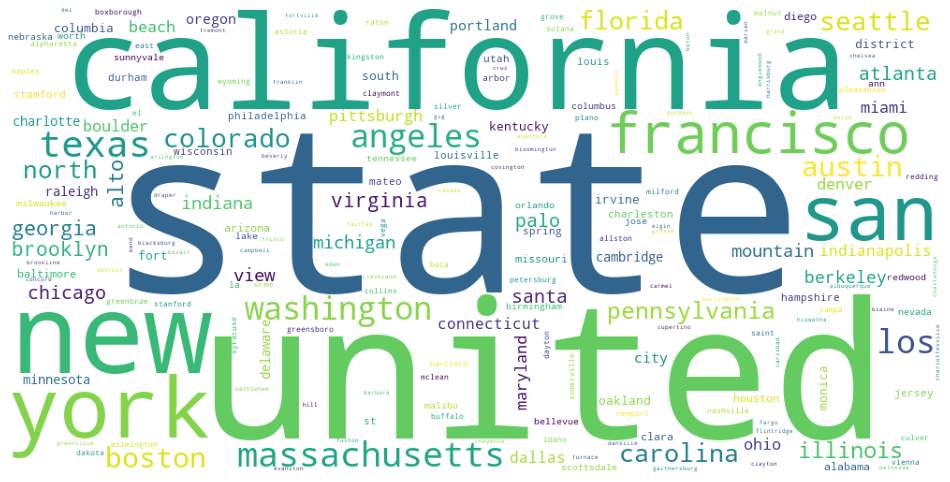

In [80]:
# A word cloud of the states in US having most startups
wc = WordCloud(
    background_color = 'white',
    width = 1000,
    height= 500
).generate_from_frequencies(words_dict)

plt.figure(figsize = (13,8))
plt.axis("off")
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.show()